In [77]:
### All available categories in Feature DB
# Aline
# Bardot
# Blouson
# boatneck
# Boxy
# Bralette
# Cape
# chokerneck
# CinchedWaist
# Empire
# Lace

In [1]:
import uuid
import io
import numpy as np
from PIL import Image
from pathlib import Path

import logging

from src.features import FeatureExtractor
from src.search import FSearch
from src.utils import *
from src.configs import config

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import math

def show_image_dir(dir_name=None, list_paths=None, cols=10, figsize=(20,5), save_fig = True):
    """
    This Function displays the Images in a directory/list
    
    Arguments:
    dir_name: Directory Address to display
    list_paths: list of image paths
    cols: number of images to plot in a row
    """
    if dir_name is not None:
        files = glob.glob(os.path.join(dir_name, "*"))
    elif list_paths is not None:
        files = list_paths
    else:
        raise Exception("not found dir_name or list_paths")
        
    fig=plt.figure(figsize=figsize)
    plt.axis("off")
    fig.subplots_adjust(hspace=0.05, wspace=0.01)
    columns = cols
    rows = math.ceil(len(files)/columns)

    for i in range(1, columns*rows +1):
        if i>len(files):
            break
        img = mpimg.imread(files[i-1])
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.title(files[i-1].stem)

    plt.tight_layout()
    # plt.show()
    if save_fig:
        fig.savefig(f"results/{list_paths[0].stem}.jpg")

In [2]:
IMG_PATH = config.IMG_PATH
FEATURE_PATH = config.FEATURE_PATH
MODEL_PATH = config.MODEL_PATH

In [3]:
print(IMG_PATH, FEATURE_PATH, MODEL_PATH)

/home/ash2703/work-area/Fynd-work/visual-search/fashion_data/images /home/ash2703/work-area/Fynd-work/visual-search/fashion_data/features /home/ash2703/work-area/Fynd-work/visual-search/weights/last.ckpt


In [4]:
fe=FeatureExtractor(MODEL_PATH)
fs = FSearch(FEATURE_PATH, IMG_PATH, d = config.FEATURE_DIM)

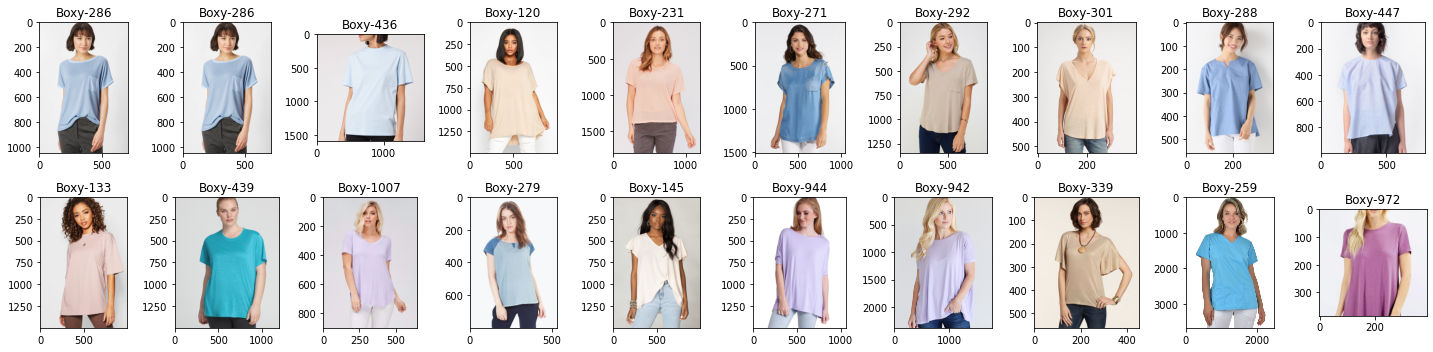

In [70]:
QUERY_PATH = Path("test") / "Boxy-286.jpg" 
img_feats = fe.extract(QUERY_PATH).numpy().reshape(1, -1)
_, ids = fs.query(img_feats, 19)

match_img_paths = [QUERY_PATH] + [fs.img_paths[id] for id in ids[0]]
show_image_dir(list_paths = match_img_paths)


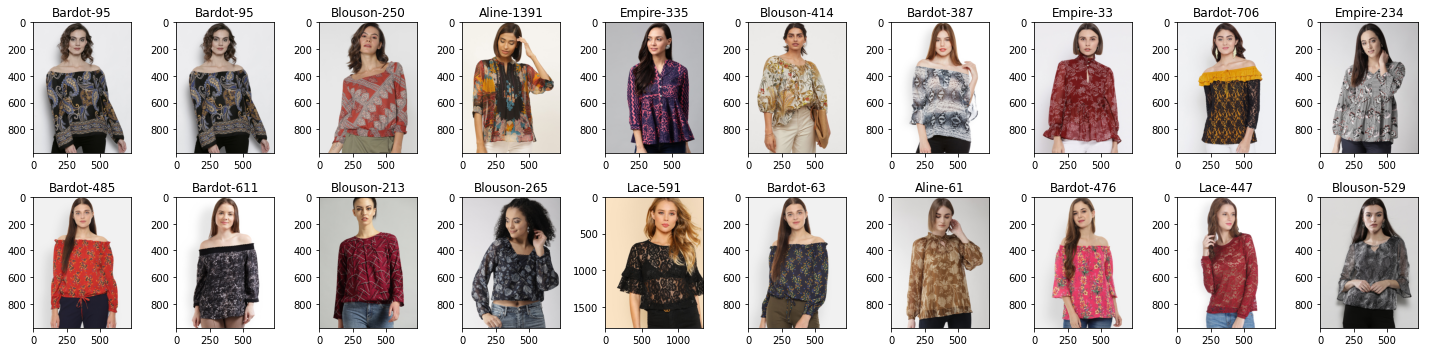

In [71]:
QUERY_PATH = Path("test") / "Bardot-95.jpg" 
img_feats = fe.extract(QUERY_PATH).numpy().reshape(1, -1)
_, ids = fs.query(img_feats, 19)

match_img_paths = [QUERY_PATH] + [fs.img_paths[id] for id in ids[0]]
show_image_dir(list_paths = match_img_paths)

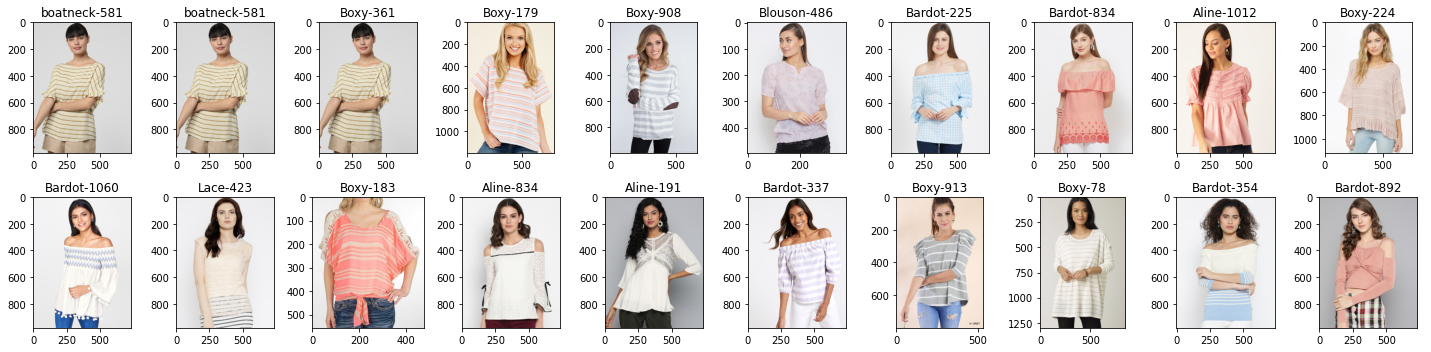

In [72]:
QUERY_PATH = Path("test") / "boatneck-581.jpg" 
img_feats = fe.extract(QUERY_PATH).numpy().reshape(1, -1)
_, ids = fs.query(img_feats, 19)

match_img_paths = [QUERY_PATH] + [fs.img_paths[id] for id in ids[0]]
show_image_dir(list_paths = match_img_paths)

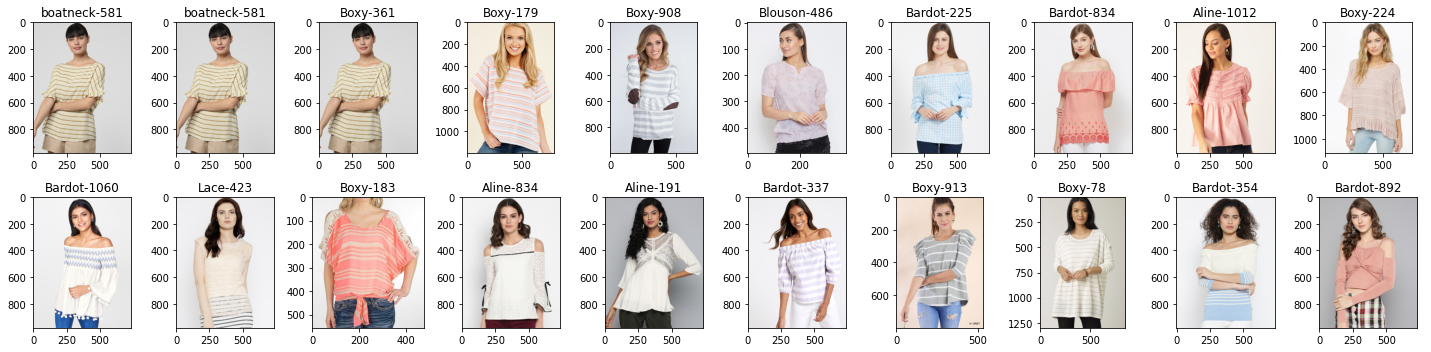

In [73]:
QUERY_PATH = Path("test") / "boatneck-581.jpg" 
img_feats = fe.extract(QUERY_PATH).numpy().reshape(1, -1)
_, ids = fs.query(img_feats, 19)

match_img_paths = [QUERY_PATH] + [fs.img_paths[id] for id in ids[0]]
show_image_dir(list_paths = match_img_paths)

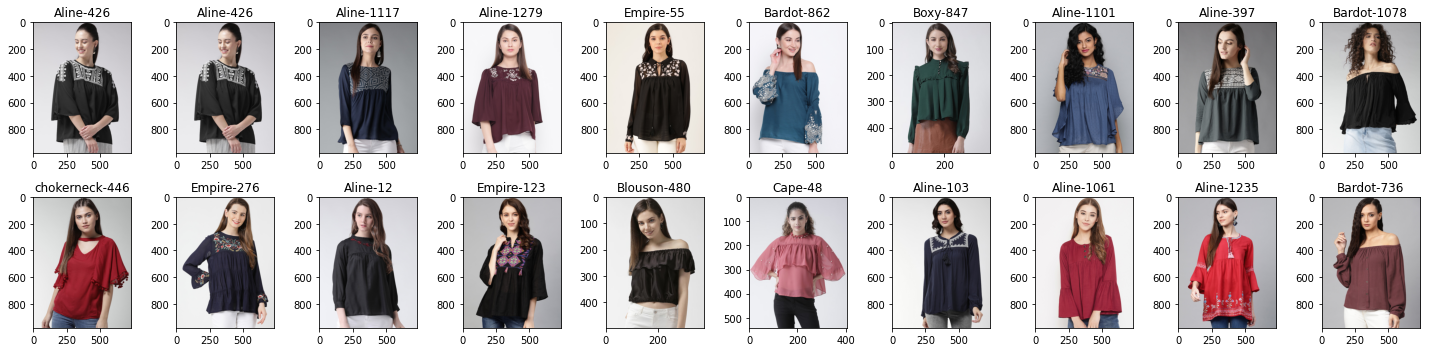

In [74]:
QUERY_PATH = Path("test") / "Aline-426.jpg" 
img_feats = fe.extract(QUERY_PATH).numpy().reshape(1, -1)
_, ids = fs.query(img_feats, 19)

match_img_paths = [QUERY_PATH] + [fs.img_paths[id] for id in ids[0]]
show_image_dir(list_paths = match_img_paths)

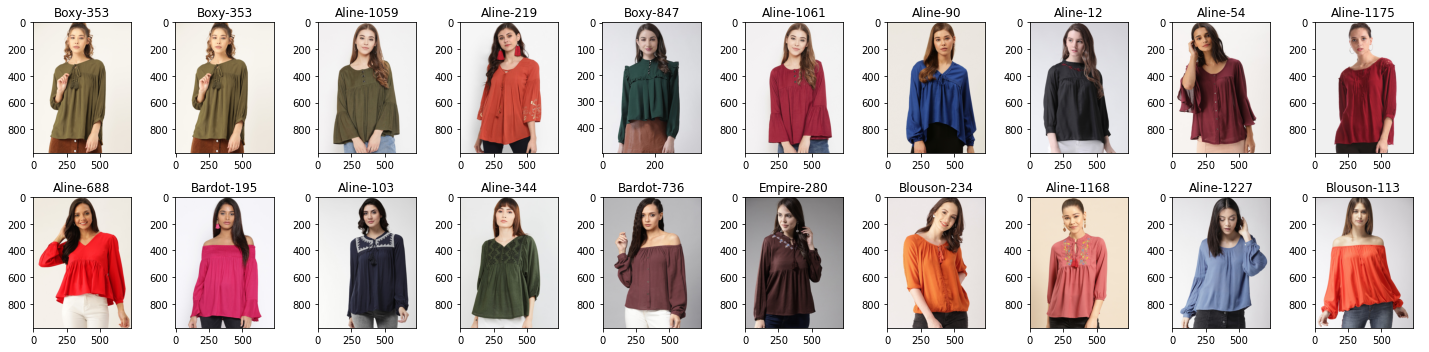

In [75]:
QUERY_PATH = Path("test") / "Boxy-353.jpg" 
img_feats = fe.extract(QUERY_PATH).numpy().reshape(1, -1)
_, ids = fs.query(img_feats, 19)

match_img_paths = [QUERY_PATH] + [fs.img_paths[id] for id in ids[0]]
show_image_dir(list_paths = match_img_paths)

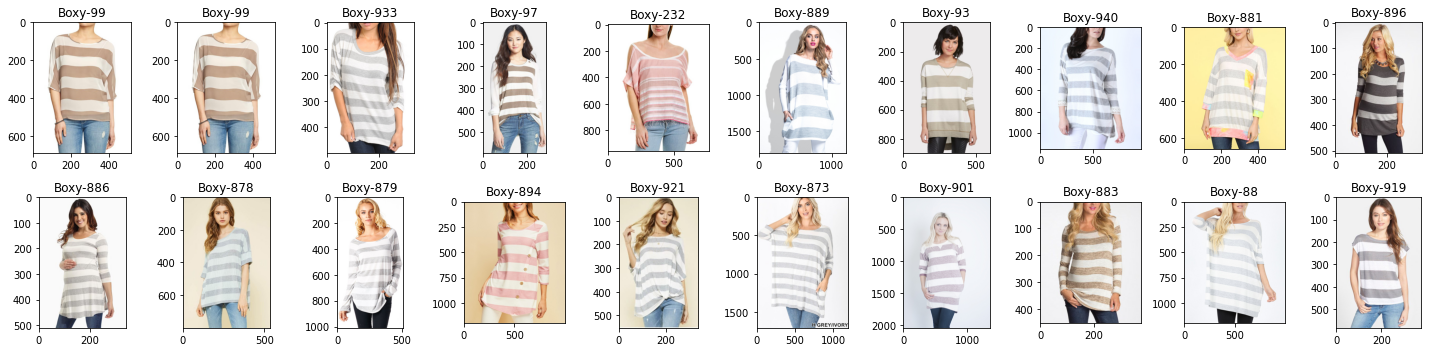

In [76]:
QUERY_PATH = Path("test") / "Boxy-99.jpg" 
img_feats = fe.extract(QUERY_PATH).numpy().reshape(1, -1)
_, ids = fs.query(img_feats, 19)

match_img_paths = [QUERY_PATH] + [fs.img_paths[id] for id in ids[0]]
show_image_dir(list_paths = match_img_paths)

In [80]:
#Add test images in test/ folder
QUERY_PATH = Path("test").glob("*")
for query in QUERY_PATH:
    img_feats = fe.extract(query).numpy().reshape(1, -1)
    _, ids = fs.query(img_feats, 19)
    
    match_img_paths = [query] + [fs.img_paths[id] for id in ids[0]]
    show_image_dir(list_paths = match_img_paths)